# Data Methods for Health Research Assignment

#### Candidate: ZVQQ1

In [214]:
#import relevant libraries for assignment

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.stats import norm
import seaborn as sns
%matplotlib inline

In [215]:
cd

/Users/KM


In [216]:
cd Desktop

/Users/KM/Desktop


In [217]:
cd DMHR

/Users/KM/Desktop/DMHR


In [218]:
#Import GP practice and prescribing file
patients_april2018 = pd.read_csv("gpreg_pat_prac_all.csv")
prescribe_april2018 = pd.read_csv("https://files.digital.nhs.uk/38/03EC1C/T201804PDPI%20BNFT.CSV")

Exploratory Data Analysis of GP practice file

In [229]:
#Rows and columns
patients_april2018.shape

(7241, 10)

In [230]:
#First 5 rows
patients_april2018.head()

,PUBLICATION,EXTRACT_DATE,TYPE,CCG_CODE,ONS_CCG_CODE,CODE,POSTCODE,SEX,AGE,NUMBER_OF_PATIENTS
0,GP_PRAC_PAT_LIST,01-Apr-18,GP,00C,E38000042,A83005,DL1 3RT,ALL,ALL,11826
1,GP_PRAC_PAT_LIST,01-Apr-18,GP,00C,E38000042,A83006,DL3 6HZ,ALL,ALL,8044
2,GP_PRAC_PAT_LIST,01-Apr-18,GP,00C,E38000042,A83010,DL3 9JP,ALL,ALL,14070
3,GP_PRAC_PAT_LIST,01-Apr-18,GP,00C,E38000042,A83013,DL1 4YL,ALL,ALL,11298
4,GP_PRAC_PAT_LIST,01-Apr-18,GP,00C,E38000042,A83031,DL3 8SQ,ALL,ALL,10109


In [231]:
#Check if there are any missing values in any of the columns. No missing values. 
print(patients_april2018.isnull().sum())

PUBLICATION           0
EXTRACT_DATE          0
TYPE                  0
CCG_CODE              0
ONS_CCG_CODE          0
CODE                  0
POSTCODE              0
SEX                   0
AGE                   0
NUMBER_OF_PATIENTS    0
dtype: int64


In [232]:
#Descriptive statistics
patients_april2018.describe()

,NUMBER_OF_PATIENTS
count,7241.000000
mean,8153.514017
std,5184.888435
min,1.000000
25%,4501.000000
50%,7235.000000
75%,10711.000000
max,72227.000000


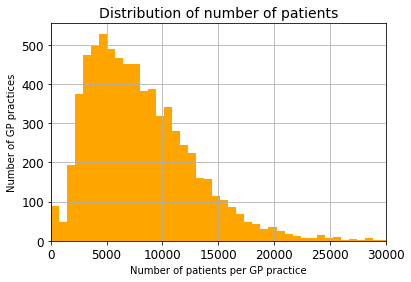

In [233]:
#Histogram showing distribution of number of patients
patients_april2018["NUMBER_OF_PATIENTS"].hist(bins=100, grid=True, xlabelsize=12, ylabelsize=12, color="orange")
plt.xlabel("Number of patients per GP practice", fontsize=10)
plt.ylabel("Number of GP practices", fontsize=10)
plt.xlim(0,30000)
plt.title("Distribution of number of patients", fontsize=14)
plt.show()

Exploratory Data Analysis of Prescribing file

In [234]:
prescribe_april2018.shape

(9748354, 11)

In [235]:
prescribe_april2018.head()

,SHA,PCT,PRACTICE,BNF CODE,BNF NAME,ITEMS,NIC,ACT COST,QUANTITY,PERIOD,
0,Q44,RTV,Y04937,0401010Z0AAAAAA,Zopiclone_Tab 7.5mg,6,1.56,2.12,63,201804,
1,Q44,RTV,Y04937,0401020K0AAAHAH,Diazepam_Tab 2mg,4,0.87,1.15,73,201804,
2,Q44,RTV,Y04937,0401020K0AAAIAI,Diazepam_Tab 5mg,2,0.46,0.56,35,201804,
3,Q44,RTV,Y04937,0402010ABAAABAB,Quetiapine_Tab 25mg,1,2.60,2.52,14,201804,
4,Q44,RTV,Y04937,0402010ADAAAAAA,Aripiprazole_Tab 10mg,1,1.53,1.53,14,201804,


In [236]:
print(prescribe_april2018.isnull().sum())

#no missing values

 SHA                                            0
PCT                                             0
PRACTICE                                        0
BNF CODE                                        0
BNF NAME                                        0
ITEMS                                           0
NIC                                             0
ACT COST                                        0
QUANTITY                                        0
PERIOD                                          0
                                                0
dtype: int64


In [237]:
prescribe_april2018.describe()

,ITEMS,NIC,ACT COST,QUANTITY,PERIOD
count,9.748354e+06,9.748354e+06,9.748354e+06,9.748354e+06,9748354.0
mean,9.115409e+00,7.078242e+01,6.597908e+01,7.135560e+02,201804.0
std,2.999382e+01,1.918400e+02,1.782526e+02,4.124964e+03,0.0
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,201804.0
25%,1.000000e+00,7.920000e+00,7.460000e+00,2.800000e+01,201804.0
50%,2.000000e+00,2.250000e+01,2.112000e+01,9.000000e+01,201804.0
75%,6.000000e+00,6.286000e+01,5.868000e+01,3.360000e+02,201804.0
max,5.147000e+03,3.391873e+04,3.145594e+04,2.281694e+06,201804.0


## Question 1
#### Identify all GP practices located in London. For those practices, describe:
* the total number of patients registered
* the total number of prescriptions
* the total actual cost of these prescriptions (using the ACT COST column)
* the top 10 most frequent drugs prescribed
* the bottom 10 less frequent drugs prescribed


In [238]:
Patients_london = patients_april2018[patients_april2018["CCG_CODE"].str.match("07[L-Y]|08[A-Y]|09A")].copy(deep=True)
Total_pat_london = Patients_london["NUMBER_OF_PATIENTS"].sum()
print(Total_pat_london, "= number of patients registered at London GPs")

9851208 = number of patients registered at London GPs


In [239]:
Patients_london.head()

,PUBLICATION,EXTRACT_DATE,TYPE,CCG_CODE,ONS_CCG_CODE,CODE,POSTCODE,SEX,AGE,NUMBER_OF_PATIENTS
3628,GP_PRAC_PAT_LIST,01-Apr-18,GP,07L,E38000004,F82001,RM9 5AS,ALL,ALL,6761
3629,GP_PRAC_PAT_LIST,01-Apr-18,GP,07L,E38000004,F82003,RM10 9AT,ALL,ALL,5307
3630,GP_PRAC_PAT_LIST,01-Apr-18,GP,07L,E38000004,F82005,RM10 9RR,ALL,ALL,6010
3631,GP_PRAC_PAT_LIST,01-Apr-18,GP,07L,E38000004,F82012,RM9 5TT,ALL,ALL,4105
3632,GP_PRAC_PAT_LIST,01-Apr-18,GP,07L,E38000004,F82015,RM9 6HT,ALL,ALL,5795


In [240]:
#Number of GP practices in London
Patients_london.count()

PUBLICATION           1323
EXTRACT_DATE          1323
TYPE                  1323
CCG_CODE              1323
ONS_CCG_CODE          1323
CODE                  1323
POSTCODE              1323
SEX                   1323
AGE                   1323
NUMBER_OF_PATIENTS    1323
dtype: int64

In [241]:
Prescriptions_London = prescribe_april2018.merge(Patients_london, left_on='PRACTICE', right_on='CODE')

In [242]:
Prescriptions_London.head()

,SHA,PCT,PRACTICE,BNF CODE,BNF NAME,ITEMS,NIC,ACT COST,QUANTITY,PERIOD,...,PUBLICATION,EXTRACT_DATE,TYPE,CCG_CODE,ONS_CCG_CODE,CODE,POSTCODE,SEX,AGE,NUMBER_OF_PATIENTS
0,Q61,07L,F82001,0101010L0BEAAAI,Maalox Plus_Susp,1,2.91,2.71,250,201804,...,GP_PRAC_PAT_LIST,01-Apr-18,GP,07L,E38000004,F82001,RM9 5AS,ALL,ALL,6761
1,Q61,07L,F82001,0101021B0BEADAJ,Gaviscon Infant_Sach 2g (Dual Pack) S/F,1,19.28,17.89,60,201804,...,GP_PRAC_PAT_LIST,01-Apr-18,GP,07L,E38000004,F82001,RM9 5AS,ALL,ALL,6761
2,Q61,07L,F82001,0101021B0BEAFAH,Gaviscon_Liq Relief Peppermint,2,27.75,25.76,1800,201804,...,GP_PRAC_PAT_LIST,01-Apr-18,GP,07L,E38000004,F82001,RM9 5AS,ALL,ALL,6761
3,Q61,07L,F82001,0101021B0BEAIAL,Gaviscon Advance_Liq (Aniseed) (Reckitt),10,56.32,52.36,5500,201804,...,GP_PRAC_PAT_LIST,01-Apr-18,GP,07L,E38000004,F82001,RM9 5AS,ALL,ALL,6761
4,Q61,07L,F82001,0101021B0BEBEAL,Gaviscon Advance_Liq (Peppermint) S/F,13,82.92,77.26,7650,201804,...,GP_PRAC_PAT_LIST,01-Apr-18,GP,07L,E38000004,F82001,RM9 5AS,ALL,ALL,6761


In [243]:
Total_presc_lon = Prescriptions_London.iloc[:,5].sum()
print(Total_presc_lon, "= total number of prescriptions in London GP practices.")

10416926 = total number of prescriptions in London GP practices.


In [244]:
Total_actual_cost1 = Prescriptions_London.iloc[:,7].sum()
print(Total_actual_cost1, "= total actual cost of all items prescribed in London GP practices.")

76586738.71000002 = total actual cost of all items prescribed in London GP practices.


In [245]:
#Data presented in the following table
df1 = pd.DataFrame(np.array([[1323], [Total_pat_london], [Total_presc_lon], [Total_actual_cost1]]),
                  columns=['London'], index=['number of GP practices', 'number of patients', 'number of prescriptions', 'total actual cost'])
df1

,London
number of GP practices,1323.00
number of patients,9851208.00
number of prescriptions,10416926.00
total actual cost,76586738.71


In [246]:
#top 10 most frequent drugs prescribed in London GP practices
presc_lon_ordered = Prescriptions_London.sort_values(by='ITEMS  ', ascending= False)
presc_lon_ordered.head(10)

,SHA,PCT,PRACTICE,BNF CODE,BNF NAME,ITEMS,NIC,ACT COST,QUANTITY,PERIOD,...,PUBLICATION,EXTRACT_DATE,TYPE,CCG_CODE,ONS_CCG_CODE,CODE,POSTCODE,SEX,AGE,NUMBER_OF_PATIENTS
514351,Q61,08W,F86018,1404000H0AAAKAK,Influenza_Vac SplitViron Inact 0.5ml Pfs,2249,14820.91,13744.79,2249,201804,...,GP_PRAC_PAT_LIST,01-Apr-18,GP,08W,E38000192,F86018,E17 9DP,ALL,ALL,9510
235463,Q61,07X,Y03402,1404000H0AAAKAK,Influenza_Vac SplitViron Inact 0.5ml Pfs,2012,13259.08,12296.36,2012,201804,...,GP_PRAC_PAT_LIST,01-Apr-18,GP,07X,E38000057,Y03402,N9 0TW,ALL,ALL,20038
1260702,Q63,08Q,G85034,0103050P0AAAAAA,Omeprazole_Cap E/C 20mg,1885,1424.43,1438.32,66473,201804,...,GP_PRAC_PAT_LIST,01-Apr-18,GP,08Q,E38000171,G85034,SE1 6JP,ALL,ALL,72227
1261964,Q63,08Q,G85034,0601022B0AAABAB,Metformin HCl_Tab 500mg,1654,5078.09,4770.96,157954,201804,...,GP_PRAC_PAT_LIST,01-Apr-18,GP,08Q,E38000171,G85034,SE1 6JP,ALL,ALL,72227
1260984,Q63,08Q,G85034,0206020A0AAABAB,Amlodipine_Tab 10mg,1578,3175.91,3037.49,56218,201804,...,GP_PRAC_PAT_LIST,01-Apr-18,GP,08Q,E38000171,G85034,SE1 6JP,ALL,ALL,72227
1261091,Q63,08Q,G85034,0212000B0AAABAB,Atorvastatin_Tab 20mg,1548,1287.01,1292.84,51322,201804,...,GP_PRAC_PAT_LIST,01-Apr-18,GP,08Q,E38000171,G85034,SE1 6JP,ALL,ALL,72227
1261092,Q63,08Q,G85034,0212000B0AAACAC,Atorvastatin_Tab 40mg,1378,1204.49,1225.39,34285,201804,...,GP_PRAC_PAT_LIST,01-Apr-18,GP,08Q,E38000171,G85034,SE1 6JP,ALL,ALL,72227
1260983,Q63,08Q,G85034,0206020A0AAAAAA,Amlodipine_Tab 5mg,1313,2191.75,2114.40,42883,201804,...,GP_PRAC_PAT_LIST,01-Apr-18,GP,08Q,E38000171,G85034,SE1 6JP,ALL,ALL,72227
1261512,Q63,08Q,G85034,0407010H0AAAMAM,Paracet_Tab 500mg,1205,1226.11,1195.59,126500,201804,...,GP_PRAC_PAT_LIST,01-Apr-18,GP,08Q,E38000171,G85034,SE1 6JP,ALL,ALL,72227
300796,Q61,08F,F82030,1404000H0BWAAAF,Quadrivalent_Vac Inact 0.5ml Pfs,1184,9472.00,8784.25,1184,201804,...,GP_PRAC_PAT_LIST,01-Apr-18,GP,08F,E38000077,F82030,RM5 3QL,ALL,ALL,11822


In [247]:
#the bottom 10 less frequent drugs prescribed
presc_lon_ordered.tail(10)

,SHA,PCT,PRACTICE,BNF CODE,BNF NAME,ITEMS,NIC,ACT COST,QUANTITY,PERIOD,...,PUBLICATION,EXTRACT_DATE,TYPE,CCG_CODE,ONS_CCG_CODE,CODE,POSTCODE,SEX,AGE,NUMBER_OF_PATIENTS
658055,Q62,07W,E85623,0501110C0AAAJAJ,Metronidazole_Tab 400mg,1,2.87,2.77,14,201804,...,GP_PRAC_PAT_LIST,01-Apr-18,GP,07W,E38000048,E85623,UB1 2TS,ALL,ALL,2018
658056,Q62,07W,E85623,0501120L0AAAAAA,Ciprofloxacin_Tab 250mg,1,0.78,0.74,20,201804,...,GP_PRAC_PAT_LIST,01-Apr-18,GP,07W,E38000048,E85623,UB1 2TS,ALL,ALL,2018
658058,Q62,07W,E85623,0502010B0AAABAB,Fluconazole_Cap 150mg,1,0.39,0.37,1,201804,...,GP_PRAC_PAT_LIST,01-Apr-18,GP,07W,E38000048,E85623,UB1 2TS,ALL,ALL,2018
658060,Q62,07W,E85623,0503021C0AAABAB,Aciclovir_Tab 200mg,1,0.83,0.78,25,201804,...,GP_PRAC_PAT_LIST,01-Apr-18,GP,07W,E38000048,E85623,UB1 2TS,ALL,ALL,2018
658061,Q62,07W,E85623,0503021C0AAACAC,Aciclovir_Tab 400mg,1,4.78,4.45,112,201804,...,GP_PRAC_PAT_LIST,01-Apr-18,GP,07W,E38000048,E85623,UB1 2TS,ALL,ALL,2018
658062,Q62,07W,E85623,0503021C0AAADAD,Aciclovir_Tab 800mg,1,2.88,2.68,35,201804,...,GP_PRAC_PAT_LIST,01-Apr-18,GP,07W,E38000048,E85623,UB1 2TS,ALL,ALL,2018
658063,Q62,07W,E85623,0504010T0AAAEAE,Quinine Bisulf_Tab 300mg,1,5.14,4.78,56,201804,...,GP_PRAC_PAT_LIST,01-Apr-18,GP,07W,E38000048,E85623,UB1 2TS,ALL,ALL,2018
658065,Q62,07W,E85623,0505010D0AAAAAA,Mebendazole_Oral Susp 100mg/5ml,1,1.55,1.45,30,201804,...,GP_PRAC_PAT_LIST,01-Apr-18,GP,07W,E38000048,E85623,UB1 2TS,ALL,ALL,2018
658067,Q62,07W,E85623,0601011L0BBACAC,Ins Humalog_100u/ml 3ml Cart,1,28.31,26.27,5,201804,...,GP_PRAC_PAT_LIST,01-Apr-18,GP,07W,E38000048,E85623,UB1 2TS,ALL,ALL,2018
1401349,Q63,08X,Y02946,23944809510,ConvaTec_Combihesive Natura Drnbl Pouch,1,13.44,12.46,10,201804,...,GP_PRAC_PAT_LIST,01-Apr-18,GP,08X,E38000193,Y02946,SW11 2NU,ALL,ALL,8345


In [248]:
#Number of GP practices in London
Patients_london.count()

PUBLICATION           1323
EXTRACT_DATE          1323
TYPE                  1323
CCG_CODE              1323
ONS_CCG_CODE          1323
CODE                  1323
POSTCODE              1323
SEX                   1323
AGE                   1323
NUMBER_OF_PATIENTS    1323
dtype: int64

## Question 2
#### Identify all GP practices located in Cambridge. For those practices, describe:
* the total number of patients registered
* the total number of prescriptions
* the total actual cost of these prescriptions (using the ACT COST column)
* the top 10 most frequent drugs prescribed
* the bottom 10 less frequent drugs prescribed

In [249]:
Pat_camb = patients_april2018[(patients_april2018["POSTCODE"].str.match('CB[1-5]'))].copy(deep=True)
Total_pat_camb = Pat_camb["NUMBER_OF_PATIENTS"].sum()
print(Total_pat_camb, "= number of patients registered at Cambridge GPs.")

366333 = number of patients registered at Cambridge GPs.


In [250]:
#Number of practices in Cambridge
Total_practices_camb = Pat_camb.count()

In [251]:
Pat_camb.head()

,PUBLICATION,EXTRACT_DATE,TYPE,CCG_CODE,ONS_CCG_CODE,CODE,POSTCODE,SEX,AGE,NUMBER_OF_PATIENTS
3050,GP_PRAC_PAT_LIST,01-Apr-18,GP,06H,E38000026,D81001,CB2 1EH,ALL,ALL,12057
3051,GP_PRAC_PAT_LIST,01-Apr-18,GP,06H,E38000026,D81002,CB3 0DB,ALL,ALL,16939
3052,GP_PRAC_PAT_LIST,01-Apr-18,GP,06H,E38000026,D81003,CB1 2PY,ALL,ALL,9927
3054,GP_PRAC_PAT_LIST,01-Apr-18,GP,06H,E38000026,D81005,CB3 9HS,ALL,ALL,14941
3057,GP_PRAC_PAT_LIST,01-Apr-18,GP,06H,E38000026,D81009,CB22 5FY,ALL,ALL,9071


In [252]:
Prescriptions_Cambridge = prescribe_april2018.merge(Pat_camb, left_on='PRACTICE', right_on='CODE')
Prescriptions_Cambridge.head()

,SHA,PCT,PRACTICE,BNF CODE,BNF NAME,ITEMS,NIC,ACT COST,QUANTITY,PERIOD,...,PUBLICATION,EXTRACT_DATE,TYPE,CCG_CODE,ONS_CCG_CODE,CODE,POSTCODE,SEX,AGE,NUMBER_OF_PATIENTS
0,Q56,06H,D81001,0101021B0AAAHAH,Alginate_Raft-Forming Oral Susp S/F,3,12.13,11.29,2300,201804,...,GP_PRAC_PAT_LIST,01-Apr-18,GP,06H,E38000026,D81001,CB2 1EH,ALL,ALL,12057
1,Q56,06H,D81001,0101021B0AAALAL,Sod Algin/Pot Bicarb_Susp S/F,3,14.85,13.91,1450,201804,...,GP_PRAC_PAT_LIST,01-Apr-18,GP,06H,E38000026,D81001,CB2 1EH,ALL,ALL,12057
2,Q56,06H,D81001,0101021B0BEACAH,Gaviscon_Liq Orig Aniseed Relief,1,11.85,11.10,1000,201804,...,GP_PRAC_PAT_LIST,01-Apr-18,GP,06H,E38000026,D81001,CB2 1EH,ALL,ALL,12057
3,Q56,06H,D81001,0101021B0BEADAJ,Gaviscon Infant_Sach 2g (Dual Pack) S/F,2,9.64,8.96,30,201804,...,GP_PRAC_PAT_LIST,01-Apr-18,GP,06H,E38000026,D81001,CB2 1EH,ALL,ALL,12057
4,Q56,06H,D81001,0101021B0BEAUA0,Gaviscon P/Mint_Tab Chble,2,29.59,27.57,336,201804,...,GP_PRAC_PAT_LIST,01-Apr-18,GP,06H,E38000026,D81001,CB2 1EH,ALL,ALL,12057


In [253]:
Total_presc_camb = Prescriptions_Cambridge.iloc[:,5].sum()
print(Total_presc_camb, "= total number of prescriptions in Cambridge GP practices.")

417095 = total number of prescriptions in Cambridge GP practices.


In [254]:
Total_actual_cost2 = Prescriptions_Cambridge.iloc[:,7].sum()
print(Total_actual_cost2, "= total actual cost of all items prescribed in Cambridge GP practices.")

2931133.94 = total actual cost of all items prescribed in Cambridge GP practices.


In [255]:
#Data presented in the following table
df2 = pd.DataFrame(np.array([[37], [Total_pat_camb], [Total_presc_camb], [Total_actual_cost2]]),
                  columns=['Cambridge'], index=['number of GP practices', 'number of patients', 'number of prescriptions', 'total actual cost'])
df2 

,Cambridge
number of GP practices,37.00
number of patients,366333.00
number of prescriptions,417095.00
total actual cost,2931133.94


In [256]:
#Top 10 most frequent drugs prescribed in Cambridge GP practices
presc_camb_ordered = Prescriptions_Cambridge.sort_values(by='ITEMS  ', ascending= False)
presc_camb_ordered.head(10)

,SHA,PCT,PRACTICE,BNF CODE,BNF NAME,ITEMS,NIC,ACT COST,QUANTITY,PERIOD,...,PUBLICATION,EXTRACT_DATE,TYPE,CCG_CODE,ONS_CCG_CODE,CODE,POSTCODE,SEX,AGE,NUMBER_OF_PATIENTS
21205,Q56,06H,D81043,0103050P0AAAAAA,Omeprazole_Cap E/C 20mg,2087,1627.47,1536.47,75949,201804,...,GP_PRAC_PAT_LIST,01-Apr-18,GP,06H,E38000026,D81043,CB22 3HU,ALL,ALL,33501
21505,Q56,06H,D81043,0206020A0AAAAAA,Amlodipine_Tab 5mg,995,1390.98,1301.32,27239,201804,...,GP_PRAC_PAT_LIST,01-Apr-18,GP,06H,E38000026,D81043,CB22 3HU,ALL,ALL,33501
21624,Q56,06H,D81043,0212000B0AAABAB,Atorvastatin_Tab 20mg,955,670.96,632.75,25921,201804,...,GP_PRAC_PAT_LIST,01-Apr-18,GP,06H,E38000026,D81043,CB22 3HU,ALL,ALL,33501
21608,Q56,06H,D81043,0209000A0AAABAB,Aspirin Disper_Tab 75mg,817,258.14,250.44,21917,201804,...,GP_PRAC_PAT_LIST,01-Apr-18,GP,06H,E38000026,D81043,CB22 3HU,ALL,ALL,33501
21653,Q56,06H,D81043,0212000Y0AAADAD,Simvastatin_Tab 40mg,816,503.55,476.53,21693,201804,...,GP_PRAC_PAT_LIST,01-Apr-18,GP,06H,E38000026,D81043,CB22 3HU,ALL,ALL,33501
22522,Q56,06H,D81043,0602010V0AABZBZ,Levothyrox Sod_Tab 100mcg,740,726.37,683.25,21186,201804,...,GP_PRAC_PAT_LIST,01-Apr-18,GP,06H,E38000026,D81043,CB22 3HU,ALL,ALL,33501
22020,Q56,06H,D81043,0407010H0AAAMAM,Paracet_Tab 500mg,691,947.27,892.38,92043,201804,...,GP_PRAC_PAT_LIST,01-Apr-18,GP,06H,E38000026,D81043,CB22 3HU,ALL,ALL,33501
1534,Q56,06H,D81002,0212000B0AAABAB,Atorvastatin_Tab 20mg,685,483.24,460.21,19313,201804,...,GP_PRAC_PAT_LIST,01-Apr-18,GP,06H,E38000026,D81002,CB3 0DB,ALL,ALL,16939
22520,Q56,06H,D81043,0602010V0AABXBX,Levothyrox Sod_Tab 50mcg,678,645.04,608.60,18617,201804,...,GP_PRAC_PAT_LIST,01-Apr-18,GP,06H,E38000026,D81043,CB22 3HU,ALL,ALL,33501
22519,Q56,06H,D81043,0602010V0AABWBW,Levothyrox Sod_Tab 25mcg,644,1218.97,1143.22,18247,201804,...,GP_PRAC_PAT_LIST,01-Apr-18,GP,06H,E38000026,D81043,CB22 3HU,ALL,ALL,33501


In [257]:
#Bottom 10 less frequent drugs prescribed in Cambridge GP practices
presc_camb_ordered = Prescriptions_Cambridge.sort_values(by='ITEMS  ', ascending= False)
presc_camb_ordered.tail(10)

,SHA,PCT,PRACTICE,BNF CODE,BNF NAME,ITEMS,NIC,ACT COST,QUANTITY,PERIOD,...,PUBLICATION,EXTRACT_DATE,TYPE,CCG_CODE,ONS_CCG_CODE,CODE,POSTCODE,SEX,AGE,NUMBER_OF_PATIENTS
23394,Q56,06H,D81043,1315000G0BLAAA0,Pigmanorm_Crm,1,119.44,110.78,15,201804,...,GP_PRAC_PAT_LIST,01-Apr-18,GP,06H,E38000026,D81043,CB22 3HU,ALL,ALL,33501
23393,Q56,06H,D81043,1314000H0AAABAB,Heparinoid_Gel 0.3%,1,3.99,3.70,50,201804,...,GP_PRAC_PAT_LIST,01-Apr-18,GP,06H,E38000026,D81043,CB22 3HU,ALL,ALL,33501
23392,Q56,06H,D81043,1314000H0AAAAAA,Heparinoid_Crm 0.3%,1,3.99,3.70,50,201804,...,GP_PRAC_PAT_LIST,01-Apr-18,GP,06H,E38000026,D81043,CB22 3HU,ALL,ALL,33501
23384,Q56,06H,D81043,1310020H0BBAAAB,Canesten_Crm 1%,1,2.20,2.04,20,201804,...,GP_PRAC_PAT_LIST,01-Apr-18,GP,06H,E38000026,D81043,CB22 3HU,ALL,ALL,33501
23380,Q56,06H,D81043,1310012Q0BBAAAA,Fucidin_Oint 20mg/g,1,2.68,2.50,15,201804,...,GP_PRAC_PAT_LIST,01-Apr-18,GP,06H,E38000026,D81043,CB22 3HU,ALL,ALL,33501
23377,Q56,06H,D81043,1310012K0BCAAAR,Metrogel_Gel 0.75%,1,22.63,21.00,40,201804,...,GP_PRAC_PAT_LIST,01-Apr-18,GP,06H,E38000026,D81043,CB22 3HU,ALL,ALL,33501
23371,Q56,06H,D81043,1309000X0BBAAAA,Vaniqa_Crm 11.5%,1,56.87,52.74,60,201804,...,GP_PRAC_PAT_LIST,01-Apr-18,GP,06H,E38000026,D81043,CB22 3HU,ALL,ALL,33501
23369,Q56,06H,D81043,1309000L0AAABAB,Benzalk Chlor_Shampoo 0.5%,1,5.69,5.28,250,201804,...,GP_PRAC_PAT_LIST,01-Apr-18,GP,06H,E38000026,D81043,CB22 3HU,ALL,ALL,33501
23365,Q56,06H,D81043,1309000C0BHADBC,Polytar_Scalp Shampoo,1,3.46,3.21,150,201804,...,GP_PRAC_PAT_LIST,01-Apr-18,GP,06H,E38000026,D81043,CB22 3HU,ALL,ALL,33501
48744,Q57,07H,F81034,23803048000,Medihoney_Barrier Crm,1,14.52,13.47,3,201804,...,GP_PRAC_PAT_LIST,01-Apr-18,GP,07H,E38000197,F81034,CB11 3PY,ALL,ALL,8356


####  Comparing London to Cambridge with descriptive statistics

In [258]:
London_Camb = pd.concat([df1,df2], axis=1)
London_Camb

,London,Cambridge
number of GP practices,1323.00,37.00
number of patients,9851208.00,366333.00
number of prescriptions,10416926.00,417095.00
total actual cost,76586738.71,2931133.94


In [259]:
#Prescription per patient - London
print((London_Camb.iloc[2,0]/London_Camb.iloc[1,0]), '= prescriptions per patient registered in London GP practice')

#Prescription per patient - Cambridge
print((London_Camb.iloc[2,1]/London_Camb.iloc[1,1]), '= prescriptions per patient registered in London GP practice')

#£ spent per patient - London
print((London_Camb.iloc[3,0]/London_Camb.iloc[1,0]), '= pounds spent per patient registered in London GP practice')

#£ spent per patient - Cambrdige
print((London_Camb.iloc[3,1]/London_Camb.iloc[1,1]), '= pounds spent per patient registered in Cambridge GP practice')

1.0574262567595771 = prescriptions per patient registered in London GP practice
1.138567914984454 = prescriptions per patient registered in London GP practice
7.774349979210673 = pounds spent per patient registered in London GP practice
8.001282821913396 = pounds spent per patient registered in Cambridge GP practice


In [260]:
#Mean number of patients in a London GP practice
London_mean_pat = London_Camb.iloc[1,0]/London_Camb.iloc[0,0]
print(int(London_mean_pat), '= mean patients in a London GP practice')

#Mean number of patients in a Cambridge GP practice
Camb_mean_pat = London_Camb.iloc[1,1]/London_Camb.iloc[0,1]
print(int(Camb_mean_pat), '= mean patients in a Cambridge GP practice')

7446 = mean patients in a London GP practice
9900 = mean patients in a Cambridge GP practice


In [261]:
#Mean number of prescriptions in a London GP practice
London_mean_presc = London_Camb.iloc[2,0]/London_Camb.iloc[0,0]
print(int(London_mean_presc), '= mean prescriptions in a London GP practice')

#Mean number of prescriptions in Cambridge GP practice
Camb_mean_presc = London_Camb.iloc[2,1]/London_Camb.iloc[0,1]
print(int(Camb_mean_presc), '= mean number of prescriptions in a Cambridge GP practice')

7873 = mean prescriptions in a London GP practice
11272 = mean number of prescriptions in a Cambridge GP practice


In [262]:
#Mean actual cost of items prescribed in a London GP practice
London_mean_ac = London_Camb.iloc[3,0]/London_Camb.iloc[0,0]
print(int(London_mean_ac), '= mean actual cost of items prescribed in a London GP practice')

#Mean actual costs of items prescribed in a Cambridge GP practice
Camb_mean_ac = London_Camb.iloc[3,1]/London_Camb.iloc[0,1]
print(int(Camb_mean_ac), '= mean actual cost of items prescribed in a Cambridge GP practice')

57888 = mean actual cost of items prescribed in a London GP practice
79219 = mean actual cost of items prescribed in a Cambridge GP practice


#### Review of analysis:

* To define London, a number of strategies could have been used. For example using post codes and addresses. However, when using such strategies there were some discrepancies in areas identifying themselves as London. Therefore, a more suitable method was to use the Clinical Commissioning Group codes. The Organisation Data Service at NHS Digital publishes the list of organisation codes and addresses across the NHS. It was found that the CCG codes for healthcare services in London range from "07l" to "09A" (https://www.england.nhs.uk/ccg-details/). This result was confirmed as all practices labelled with these codes were located in London.
* A similar approach was taken to identify GP practices in Cambridge. The CCG code for Cambridge is "06H." However, this Peterborough and Cambridgeshire are convered in this code thus it is not specific enough. Therefore, post codes were used instead. The postcodes for Cambridge range from "CB1" to "CB5" (https://data.gov.uk/dataset/9bd39552-5b5c-4a87-9fdc-fb2b0142b3c8/cambridgeshire-postcodes).
* The total number of patients in London GP practices were 9851208 while in Cambridge GP practices were 366333. Around 26 times more patients are registered in London GP practices compared to Cambridge. This significant difference is not suprising as London is the capital city of the UK and one of the largest cities in Western Europe while Cambridge is a middle-sized city. This difference can also be noted in the number of GP practices in London which is 1323 while in Cambridge there are only 37 practices.
* The total number of prescriptions in April 2018 in London GP practices was 10416296 while in Cambridge the total was 417095. The total cost of these prescriptions in London was £76,586,739 while in Cambridge the cost was £2,931,134. Again, the difference is expected due to size of the cities. The ratio of London/Cambridge for total number of patients registered, total number of prescriptions and total actual cost are all around 26. 
* The number of prescriptions per patient in April 2018 in London GP practices was 1.06 while in Cambridge GP practices it was 1.14. Also, £7.77 was spent per patient in London GP practices and £8 spent per patient in a Cambridge GP practice. These per patient numbers are very similar and quite interesting as it suggests that the health of the individuals may be similar in both cities and that the size of the city does not impact per patient metrics. 
* Interesting statistics that were derived were the mean values for London and Cambridge. London GP practices in April 2018 had an average number of 7446 patients per practice while Cambridge had 9900 patients registered per practice. This suggests on average, Cambridge GP practices are slightly larger. 
* On average, the number of items prescribed in a London GP practice was 7873 while in a Cambridge GP practice it was 11272. The average total cost of these prescriptions in a London GP practice was £57,888 while in a Cambridge GP practice the average cost was £79,219. These numbers make sense as Cambridge practices are slightly large in terms of number of patients registered. 
* The top most frequent drugs prescribed in April 2018 in London GP practices were Infuenza vaccine, omeprazole, metformin, amlodipine, atorvastatin and paracetamol. This suggests that a high prevalence of cardiovascular disease, gastric reflux disease and medication dependent Type 2 Diabetes in patients in London. In Cambridge, the list was Omeprazole, amlodipine, atorvastatin, asipirin, simvastatin, levothyorixine and paracetamol. This list is similar as many drugs associated to Cardiovascular disease and reflux disease are in it. However, metformin is not present and levothyroxine is. This suggests that there is high prevalence of hypothyroidism in Cambridge. Both lists contained paracetamol which is expected as it's a commonly used medication for mild pain such as tension type headaches. One limitation of the way the lists were compiled was that certain drug names were repeated but had different doses. . For example Influenza vaccine was repeated 3 times and amlodipine and atorvastatin repeated twice in the top 10 most frequent drugs prescribed in London. These repetitions could've been merged under one name. This would allow other frequent drugs to be listed. However, having different doses of the same medication gives a further level of insight into the severity of the diseases in the population. 
* The list for least prescribed medications in London and Cambridge in April 2018 is not very informative as they all have only been prescribed once. A large number of drugs have only been prescribed once and the reason being that they're for highly specialised conditions that not many people have. 




## Question 3
#### Describe total number of prescriptions and their total actual cost (using the ACT COST column) across all practices for drugs related to:
* cardiovascular disease (British National Formulary chapter 2)
* antidepressants (British National Formulary chapter 4.3)

In [263]:
df3 = prescribe_april2018

In [264]:
df3.head()

,SHA,PCT,PRACTICE,BNF CODE,BNF NAME,ITEMS,NIC,ACT COST,QUANTITY,PERIOD,
0,Q44,RTV,Y04937,0401010Z0AAAAAA,Zopiclone_Tab 7.5mg,6,1.56,2.12,63,201804,
1,Q44,RTV,Y04937,0401020K0AAAHAH,Diazepam_Tab 2mg,4,0.87,1.15,73,201804,
2,Q44,RTV,Y04937,0401020K0AAAIAI,Diazepam_Tab 5mg,2,0.46,0.56,35,201804,
3,Q44,RTV,Y04937,0402010ABAAABAB,Quetiapine_Tab 25mg,1,2.60,2.52,14,201804,
4,Q44,RTV,Y04937,0402010ADAAAAAA,Aripiprazole_Tab 10mg,1,1.53,1.53,14,201804,


In [265]:
df3 = df3.rename(columns={df3.columns[3]:"BNF_CODE", df3.columns[4]:'BNF_NAME', df3.columns[5]:'ITEMS',
                df3.columns[7]:'ACT_COST'})

In [266]:
df3.head()

,SHA,PCT,PRACTICE,BNF_CODE,BNF_NAME,ITEMS,NIC,ACT_COST,QUANTITY,PERIOD,
0,Q44,RTV,Y04937,0401010Z0AAAAAA,Zopiclone_Tab 7.5mg,6,1.56,2.12,63,201804,
1,Q44,RTV,Y04937,0401020K0AAAHAH,Diazepam_Tab 2mg,4,0.87,1.15,73,201804,
2,Q44,RTV,Y04937,0401020K0AAAIAI,Diazepam_Tab 5mg,2,0.46,0.56,35,201804,
3,Q44,RTV,Y04937,0402010ABAAABAB,Quetiapine_Tab 25mg,1,2.60,2.52,14,201804,
4,Q44,RTV,Y04937,0402010ADAAAAAA,Aripiprazole_Tab 10mg,1,1.53,1.53,14,201804,


In [267]:
#BNF codes for CVD start with '02'
#Total number of prescriptions for CVD
cvd_presc_code = df3.BNF_CODE.str.match('02')==True
cvd_presc=np.sum(df3[cvd_presc_code].ITEMS)
print((cvd_presc), '= total number of prescriptions for cardiovascular disease in the NHS')

#Total cost for CVD
cvd_cost=np.sum(df3[cvd_presc_code].ACT_COST)
print((cvd_cost), '= total cost of CVD prescriptions in the NHS')

26449832 = total number of prescriptions for cardiovascular disease in the NHS
90193834.01999994 = total cost of CVD prescriptions in the NHS


In [268]:
#BNF codes for antidepressants start with '0403'
#Total number of antidepressant prescriptions
ad_presc_code = df3.BNF_CODE.str.match('0403')==True
ad_presc = np.sum(df3[ad_presc_code].ITEMS)
print((ad_presc), '= total number of antidepressants prescribed in the NHS')

#Total cost of antidepressants
ad_cost=np.sum(df3[ad_presc_code].ACT_COST)
print((ad_cost), '= total cost of antidepressants in the NHS')

5715873 = total number of antidepressants prescribed in the NHS
16853470.86 = total cost of antidepressants in the NHS


#### Revew of analysis:
* The total number of prescriptions for cardiovascular disease was 26,449,832 while the total number of prescriptions for antidepressants was 5,715,873.
* The total cost of prescriptions for CVD was £90,193,834 while the total costs of prescriptions for antidepressants was £16,853,471.
* Both these findings suggest that cardiovascular disease is a more prevalent condition in the NHS in April 2018 compared to antidepression.


## Question 4
####  Describe the total spending and the relative costs per patient across all practices for the month of April 2018:
* Visualize the monthly total spending per registered patients using a scatterplot and provide a trend line
* Generate a histogram for relative spending for all practices and fit a Gaussian (normal) curve

In [269]:
#Total spending across GP practices
df3_arranged=df3.groupby('PRACTICE',as_index=False)['ACT_COST'].sum()
df4 = pd.merge(patients_april2018, df3_arranged, left_on='CODE', right_on='PRACTICE').drop(columns=['TYPE','PUBLICATION','EXTRACT_DATE',
                                                                                                   'CCG_CODE','ONS_CCG_CODE','SEX','AGE','POSTCODE'])
df4['RELATIVE_SPENDING']=np.divide(df4['ACT_COST'],df4['NUMBER_OF_PATIENTS'])
df4.head()

,CODE,NUMBER_OF_PATIENTS,PRACTICE,ACT_COST,RELATIVE_SPENDING
0,A83005,11826,A83005,156599.88,13.241999
1,A83006,8044,A83006,89694.95,11.150541
2,A83010,14070,A83010,210441.47,14.956750
3,A83013,11298,A83013,137665.38,12.184934
4,A83031,10109,A83031,128457.68,12.707259


In [270]:
#Descriptive statistics for further insight
df4.describe()

,NUMBER_OF_PATIENTS,ACT_COST,RELATIVE_SPENDING
count,7191.000000,7191.000000,7191.000000
mean,8207.557224,87842.769907,11.606497
std,5161.846053,59133.286587,38.868946
min,3.000000,3.250000,0.001724
25%,4557.000000,45118.630000,8.875578
50%,7278.000000,76206.840000,10.914659
75%,10742.500000,117871.110000,12.690038
max,72227.000000,842838.180000,2830.020000


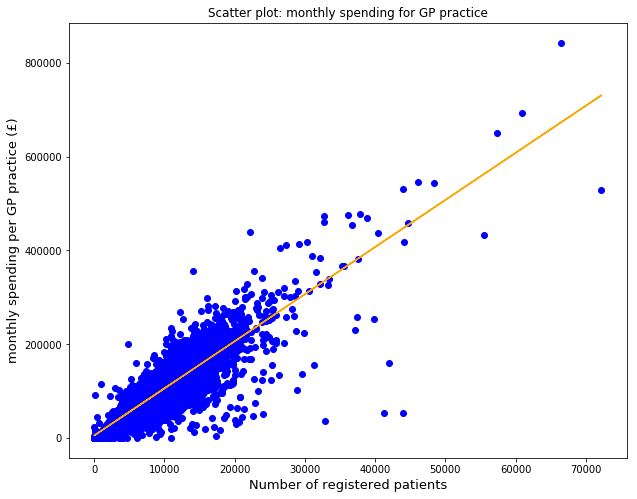

In [271]:
#Scatter plot

scatter = plt.figure(figsize=(10, 8))
ax = scatter.add_subplot(111)
x = df4["NUMBER_OF_PATIENTS"]
y = df4["ACT_COST"]
ax.scatter(x, y, color="blue")
fit = np.polyfit(x, y, deg=1)
ax.plot(x, fit[0] * x + fit[1], color="orange")
ax.set_title("Scatter plot: monthly spending for GP practice")
ax.set_xlabel("Number of registered patients", fontsize=13)
ax.set_ylabel("monthly spending per GP practice (£)", fontsize=13)
plt.show()

10.762542403425314 = mean cost per patient
2.5966670508327363 = standard deviation


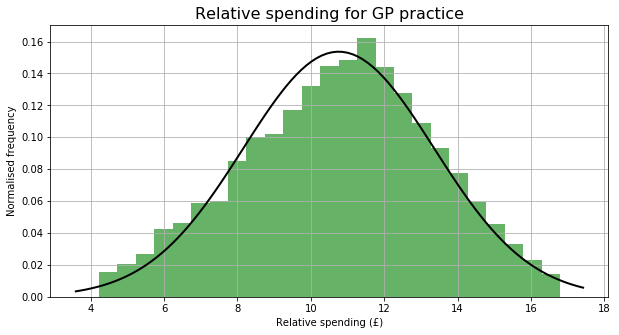

In [276]:
relative_cost = df4
quantile_2 = relative_cost["RELATIVE_SPENDING"].quantile(.02)
quantile_98 = relative_cost["RELATIVE_SPENDING"].quantile(.98)

removed_outliers = relative_cost[(relative_cost['RELATIVE_SPENDING'].values >= quantile_2) &\
                                 (relative_cost['RELATIVE_SPENDING'].values <= quantile_98)]['RELATIVE_SPENDING']

from scipy.stats import norm

# Fit a normal distribution to the data:
mu, std = norm.fit(removed_outliers)

# Plot the histogram.
plt.subplots(figsize=(10,5))
plt.hist(removed_outliers, bins=25, density=True, alpha=0.6, color='g')


# Plot the PDF.

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.ylabel ('Normalised frequency')
plt.xlabel ('Relative spending (£)')
plt.plot(x, p, 'k', linewidth=2)
plt.title('Relative spending for GP practice', fontsize=16)
plt.grid(True)


print((mu), '= mean cost per patient')
print((std), '= standard deviation')
plt.show()


#### Review of analysis:
* In total, there are a total of 7191 GP practices in APril 2018.  
* The scatter plot of monthly spending per GP practice by total number of registered patients shows that there is a linear trend. The more registered patients there are in a GP practice, the higher the monthly spending.
* Majority of practices have 30,000 or less registered patients and spend less than £400,000 per month. 
* There are a few outliers that have a very high number of registered patients but spend relatively little.
* To better understand the spending per patient, a histogram was plotted. From the data, 2% of outliers from both sides of the distribution was removed.
* The Gaussian curve shows that the relative cost per patient follows a normal distribution with a mean cost of £10.76 (std = £2.76).

# Assignment B - WHO Mortality Database

In [11]:
#Import relevant datasets
population = pd.read_csv('pop.csv')
country_codes = pd.read_csv('country_codes.csv')
mort_icd10_pt1 = pd.read_csv('Morticd10_part1.csv', low_memory=False)
mort_icd10_pt2 = pd.read_csv('Morticd10_part2.csv', low_memory=False)


Explore dataset

In [12]:
#Explore population dataframe. Pop1 = total population. Pop2 - pop26 = population stratified by age for each country
population.head()

,Country,Admin1,SubDiv,Year,Sex,Frmat,Pop1,Pop2,Pop3,Pop4,...,Pop18,Pop19,Pop20,Pop21,Pop22,Pop23,Pop24,Pop25,Pop26,Lb
0,1060,NaN,NaN,1980,1,7,137100.0,3400.0,15800.0,NaN,...,NaN,5300.0,NaN,2900.0,NaN,NaN,NaN,NaN,6500.0,5000.0
1,1060,NaN,NaN,1980,2,7,159000.0,4000.0,18400.0,NaN,...,NaN,6200.0,NaN,3400.0,NaN,NaN,NaN,NaN,7500.0,6000.0
2,1125,NaN,NaN,1955,1,2,5051500.0,150300.0,543400.0,NaN,...,110200.0,51100.0,41600.0,14300.0,11800.0,25300.0,NaN,NaN,0.0,253329.0
3,1125,NaN,NaN,1955,2,2,5049400.0,145200.0,551000.0,NaN,...,122100.0,51100.0,50700.0,15800.0,18000.0,28500.0,NaN,NaN,0.0,237901.0
4,1125,NaN,NaN,1956,1,2,5353700.0,158700.0,576600.0,NaN,...,116900.0,54100.0,44000.0,14900.0,12400.0,26600.0,NaN,NaN,0.0,250022.0


In [13]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9383 entries, 0 to 9382
Data columns (total 33 columns):
Country    9383 non-null int64
Admin1     82 non-null float64
SubDiv     138 non-null object
Year       9383 non-null int64
Sex        9383 non-null int64
Frmat      9383 non-null int64
Pop1       9383 non-null float64
Pop2       9247 non-null float64
Pop3       9247 non-null float64
Pop4       5178 non-null float64
Pop5       5178 non-null float64
Pop6       5178 non-null float64
Pop7       9247 non-null float64
Pop8       9229 non-null float64
Pop9       9247 non-null float64
Pop10      9229 non-null float64
Pop11      9247 non-null float64
Pop12      9229 non-null float64
Pop13      9247 non-null float64
Pop14      9229 non-null float64
Pop15      9247 non-null float64
Pop16      9229 non-null float64
Pop17      9247 non-null float64
Pop18      9229 non-null float64
Pop19      9247 non-null float64
Pop20      9185 non-null float64
Pop21      9091 non-null float64
Pop22      822

In [18]:
#Explore country codes dataframe. Each country has a 4 digit code
country_codes.head()

,country,name
0,1010,Algeria
1,1020,Angola
2,1025,Benin
3,1030,Botswana
4,1035,Burkina Faso


In [19]:
#There are 227 countries
country_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 2 columns):
country    227 non-null int64
name       227 non-null object
dtypes: int64(1), object(1)
memory usage: 3.6+ KB


In [20]:
#Explore Mortality ICD 10 part 1 dataframe
mort_icd10_pt1.head()

,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4
0,1400,NaN,NaN,2001,101,1000,1,7,8,332,...,95.0,NaN,NaN,NaN,NaN,0.0,8.0,NaN,NaN,NaN
1,1400,NaN,NaN,2001,101,1000,2,7,8,222,...,112.0,NaN,NaN,NaN,NaN,0.0,11.0,NaN,NaN,NaN
2,1400,NaN,NaN,2001,101,1001,1,7,8,24,...,5.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
3,1400,NaN,NaN,2001,101,1001,2,7,8,14,...,6.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
4,1400,NaN,NaN,2001,101,1002,1,7,8,0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN


In [22]:
mort_icd10_pt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1388106 entries, 0 to 1388105
Data columns (total 39 columns):
Country       1388106 non-null int64
Admin1        84173 non-null float64
SubDiv        0 non-null float64
Year          1388106 non-null int64
List          1388106 non-null object
Cause         1388106 non-null object
Sex           1388106 non-null int64
Frmat         1388106 non-null int64
IM_Frmat      1388106 non-null int64
Deaths1       1388106 non-null int64
Deaths2       1387983 non-null float64
Deaths3       1387983 non-null float64
Deaths4       1328926 non-null float64
Deaths5       1328926 non-null float64
Deaths6       1328926 non-null float64
Deaths7       1387983 non-null float64
Deaths8       1387187 non-null float64
Deaths9       1387983 non-null float64
Deaths10      1387187 non-null float64
Deaths11      1387983 non-null float64
Deaths12      1387187 non-null float64
Deaths13      1387983 non-null float64
Deaths14      1387187 non-null float64
Deaths15    

In [23]:
#Explore Mortality ICD 10 part 2 dataframe
mort_icd10_pt2.head()

,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4
0,1400,NaN,NaN,2005,101,1000,1,7,8,386,...,136.0,NaN,NaN,NaN,NaN,0.0,10.0,NaN,NaN,NaN
1,1400,NaN,NaN,2005,101,1000,2,7,8,287,...,163.0,NaN,NaN,NaN,NaN,0.0,6.0,NaN,NaN,NaN
2,1400,NaN,NaN,2005,101,1001,1,7,8,29,...,13.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
3,1400,NaN,NaN,2005,101,1001,2,7,8,21,...,16.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
4,1400,NaN,NaN,2005,101,1002,1,7,8,0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN


In [25]:
mort_icd10_pt2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2316790 entries, 0 to 2316789
Data columns (total 39 columns):
Country       int64
Admin1        float64
SubDiv        object
Year          int64
List          object
Cause         object
Sex           int64
Frmat         int64
IM_Frmat      int64
Deaths1       int64
Deaths2       float64
Deaths3       float64
Deaths4       float64
Deaths5       float64
Deaths6       float64
Deaths7       float64
Deaths8       float64
Deaths9       float64
Deaths10      float64
Deaths11      float64
Deaths12      float64
Deaths13      float64
Deaths14      float64
Deaths15      float64
Deaths16      float64
Deaths17      float64
Deaths18      float64
Deaths19      float64
Deaths20      float64
Deaths21      float64
Deaths22      float64
Deaths23      float64
Deaths24      float64
Deaths25      float64
Deaths26      float64
IM_Deaths1    float64
IM_Deaths2    float64
IM_Deaths3    float64
IM_Deaths4    float64
dtypes: float64(30), int64(6), object(3)
mem

In [26]:
#Join mortality files
mort_1_2 = mort_icd10_pt1.append(mort_icd10_pt2)




In [416]:
#Explore data frame with joined mortality files
mort_1_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3704896 entries, 0 to 2316789
Data columns (total 39 columns):
Country       int64
Admin1        float64
SubDiv        object
Year          int64
List          object
Cause         object
Sex           int64
Frmat         int64
IM_Frmat      int64
Deaths1       int64
Deaths2       float64
Deaths3       float64
Deaths4       float64
Deaths5       float64
Deaths6       float64
Deaths7       float64
Deaths8       float64
Deaths9       float64
Deaths10      float64
Deaths11      float64
Deaths12      float64
Deaths13      float64
Deaths14      float64
Deaths15      float64
Deaths16      float64
Deaths17      float64
Deaths18      float64
Deaths19      float64
Deaths20      float64
Deaths21      float64
Deaths22      float64
Deaths23      float64
Deaths24      float64
Deaths25      float64
Deaths26      float64
IM_Deaths1    float64
IM_Deaths2    float64
IM_Deaths3    float64
IM_Deaths4    float64
dtypes: float64(30), int64(6), object(3)
mem

In [27]:
#Check null values. There's missing values across mortality and population. No missing values in 'country', 'cause' and 'Year'
print(mort_1_2.isnull().sum())
print(population.isnull().sum())
print(country_codes.isnull().sum())

Country             0
Admin1        3620723
SubDiv        3702189
Year                0
List                0
Cause               0
Sex                 0
Frmat               0
IM_Frmat            0
Deaths1             0
Deaths2          2242
Deaths3          2242
Deaths4        167248
Deaths5        167248
Deaths6        167248
Deaths7          2242
Deaths8          5227
Deaths9          2242
Deaths10         5227
Deaths11         2242
Deaths12         5227
Deaths13         2242
Deaths14         5227
Deaths15         2242
Deaths16         5227
Deaths17         2242
Deaths18         5227
Deaths19         2242
Deaths20         5551
Deaths21         2566
Deaths22        13418
Deaths23        13418
Deaths24       483996
Deaths25       483996
Deaths26         2242
IM_Deaths1       2243
IM_Deaths2     841438
IM_Deaths3     752218
IM_Deaths4     752218
dtype: int64
Country       0
Admin1     9301
SubDiv     9245
Year          0
Sex           0
Frmat         0
Pop1          0
Pop2        136
P

## Question 1
####  What was the population and the total number of deaths (from all causes, all ages) in 2010 for:
* Iceland
* Italy
* New Zealand

In [28]:
#Population 2010
population_2010 = population[population["Year"] == 2010].copy()

#Mortality 2010
mort_2010 = mort_1_2[mort_1_2["Year"] == 2010].copy()


In [29]:
#Check missingness in Iceland Population 2010 and mortality 2010 files
Iceland = country_codes[country_codes["name"] == "Iceland"]["country"].item()
print(population_2010[population_2010["Country"] == Iceland].isna().sum()) 
print(mort_2010[mort_2010["Country"] == Iceland].isna().sum()) 

Country    0
Admin1     2
SubDiv     2
Year       0
Sex        0
Frmat      0
Pop1       0
Pop2       0
Pop3       0
Pop4       0
Pop5       0
Pop6       0
Pop7       0
Pop8       0
Pop9       0
Pop10      0
Pop11      0
Pop12      0
Pop13      0
Pop14      0
Pop15      0
Pop16      0
Pop17      0
Pop18      0
Pop19      0
Pop20      0
Pop21      0
Pop22      0
Pop23      0
Pop24      0
Pop25      0
Pop26      0
Lb         0
dtype: int64
Country         0
Admin1        339
SubDiv        339
Year            0
List            0
Cause           0
Sex             0
Frmat           0
IM_Frmat        0
Deaths1         0
Deaths2         0
Deaths3         0
Deaths4         0
Deaths5         0
Deaths6         0
Deaths7         0
Deaths8         0
Deaths9         0
Deaths10        0
Deaths11        0
Deaths12        0
Deaths13        0
Deaths14        0
Deaths15        0
Deaths16        0
Deaths17        0
Deaths18        0
Deaths19        0
Deaths20        0
Deaths21        0
Deaths22        0


In [30]:
#Iceland population and total number of deaths in 2010
ice_pop = population_2010[population_2010["Country"] == Iceland]["Pop1"].sum()
ice_mort = mort_2010[mort_2010["Country"] == Iceland]["Deaths1"].sum()
print(int(ice_pop), "= total population in Iceland 2010")
print(int(ice_mort), "= total number of deaths in Iceland in 2010")

318041 = total population in Iceland 2010
4038 = total number of deaths in Iceland in 2010


In [31]:
#Check missingness in Italy Population 2010 and mortality 2010 files
Italy = country_codes[country_codes["name"] == "Italy"]["country"].item()
print(population_2010[population_2010["Country"] == Italy].isna().sum()) 
print(mort_2010[mort_2010["Country"] == Italy].isna().sum()) 

Country    0
Admin1     2
SubDiv     2
Year       0
Sex        0
Frmat      0
Pop1       0
Pop2       0
Pop3       0
Pop4       0
Pop5       0
Pop6       0
Pop7       0
Pop8       0
Pop9       0
Pop10      0
Pop11      0
Pop12      0
Pop13      0
Pop14      0
Pop15      0
Pop16      0
Pop17      0
Pop18      0
Pop19      0
Pop20      0
Pop21      0
Pop22      0
Pop23      0
Pop24      0
Pop25      0
Pop26      0
Lb         0
dtype: int64
Country          0
Admin1        4970
SubDiv        4970
Year             0
List             0
Cause            0
Sex              0
Frmat            0
IM_Frmat         0
Deaths1          0
Deaths2          0
Deaths3          0
Deaths4          0
Deaths5          0
Deaths6          0
Deaths7          0
Deaths8          0
Deaths9          0
Deaths10         0
Deaths11         0
Deaths12         0
Deaths13         0
Deaths14         0
Deaths15         0
Deaths16         0
Deaths17         0
Deaths18         0
Deaths19         0
Deaths20         0
Deaths2

In [32]:
#Italy population and total number of deaths in 2010
italy_pop = population_2010[population_2010["Country"] == Italy]["Pop1"].sum()
italy_mort = mort_2010[mort_2010["Country"] == Italy]["Deaths1"].sum()
print(int(italy_pop), "= total population in Italy 2010")
print(int(italy_mort), "= total number of deaths in Italy in 2010")

60483386 = total population in Italy 2010
1169230 = total number of deaths in Italy in 2010


In [33]:
#Check missingness in New Zealand Population 2010 and mortality 2010 files
New_Zealand = country_codes[country_codes["name"] == "New Zealand"]["country"].item()
print(population_2010[population_2010["Country"] == New_Zealand].isna().sum()) 
print(mort_2010[mort_2010["Country"] == New_Zealand].isna().sum()) 

Country    0
Admin1     2
SubDiv     2
Year       0
Sex        0
Frmat      0
Pop1       0
Pop2       0
Pop3       0
Pop4       0
Pop5       0
Pop6       0
Pop7       0
Pop8       0
Pop9       0
Pop10      0
Pop11      0
Pop12      0
Pop13      0
Pop14      0
Pop15      0
Pop16      0
Pop17      0
Pop18      0
Pop19      0
Pop20      0
Pop21      0
Pop22      0
Pop23      0
Pop24      2
Pop25      2
Pop26      0
Lb         0
dtype: int64
Country          0
Admin1        2073
SubDiv        2073
Year             0
List             0
Cause            0
Sex              0
Frmat            0
IM_Frmat         0
Deaths1          0
Deaths2          0
Deaths3          0
Deaths4          0
Deaths5          0
Deaths6          0
Deaths7          0
Deaths8          0
Deaths9          0
Deaths10         0
Deaths11         0
Deaths12         0
Deaths13         0
Deaths14         0
Deaths15         0
Deaths16         0
Deaths17         0
Deaths18         0
Deaths19         0
Deaths20         0
Deaths2

In [34]:
#New Zealand population and total number of deaths in 2010
nz_pop = population_2010[population_2010["Country"] == New_Zealand]["Pop1"].sum()
nz_mort = mort_2010[mort_2010["Country"] == New_Zealand]["Deaths1"].sum()
print(int(nz_pop), "= total population in New Zealand in 2010")
print(int(nz_mort), "= total number of deaths in New Zealand in 2010")

4367360 = total population in New Zealand in 2010
57298 = total number of deaths in New Zealand in 2010


#### Review of analysis:
* In 2010, population in Iceland was 318,041 and total deaths was 4038.
* Population in Italy was 60,483,386 and total deaths was 1,169,230.
* Population in New Zealand was 4,367,360 and total deaths was 57,298.


## Question 2
####  What was the distribution of deaths (all causes, all years) by age group in Italy?
* Visualise the results using a histogram



In [45]:
#Check missing values
italy_mortality = mort_1_2[mort_1_2["Country"] == Italy].copy(deep=True)
print(italy_mortality.isnull().sum()) 

Country           0
Admin1        63356
SubDiv        63356
Year              0
List              0
Cause             0
Sex               0
Frmat             0
IM_Frmat          0
Deaths1           0
Deaths2           0
Deaths3           0
Deaths4           0
Deaths5           0
Deaths6           0
Deaths7           0
Deaths8           0
Deaths9           0
Deaths10          0
Deaths11          0
Deaths12          0
Deaths13          0
Deaths14          0
Deaths15          0
Deaths16          0
Deaths17          0
Deaths18          0
Deaths19          0
Deaths20          0
Deaths21          0
Deaths22          0
Deaths23          0
Deaths24          0
Deaths25          0
Deaths26          0
IM_Deaths1        0
IM_Deaths2        0
IM_Deaths3        0
IM_Deaths4        0
dtype: int64


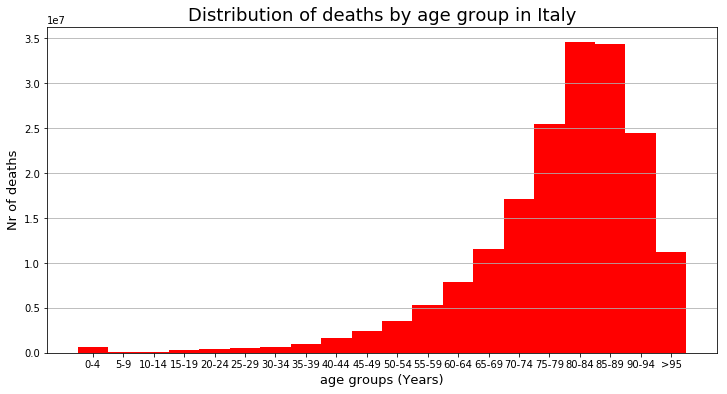

In [57]:
# Group ages 0-4
italy_mortality["Deaths2_6"] = italy_mortality["Deaths2"] + italy_mortality["Deaths3"] +\
italy_mortality["Deaths4"] + italy_mortality["Deaths5"] + italy_mortality["Deaths6"]

# add sum row
italy_mortality.loc["Total_deaths"] = italy_mortality.sum(axis=0, numeric_only=True)

# Histogram
left = list(range(0, 100, 5))
height = [italy_mortality.loc["Total_deaths", "Deaths2_6"]]
height.extend(list(italy_mortality.iloc[-1, 15:-6]))
tick_label = ["0-4", "5-9", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", \
              "60-64", "65-69", "70-74", "75-79", "80-84", "85-89", "90-94", ">95"]

fig0 = plt.figure(figsize=(12, 6))
plt1 = fig0.add_subplot(111)
plt1.bar(left, height, tick_label=tick_label, width=5, color=["red"])
plt1.set_xlabel("age groups (Years)", fontsize=13)
plt1.set_ylabel("Nr of deaths", fontsize=13)
plt.title("Distribution of deaths by age group in Italy", fontsize=18)

plt.grid(axis="y")
plt.show()





#### Revew of analysis:
* A bar chart was used to visualise the data as opposed to a hisotgram. The reason for this was the age bands that the data is in, removing the need to categorise it into bins. 
* It's clear that the data is negatively skewed. The most number of deaths happen between ages 80 and 89. 
* There a higher number of deaths in the age band: 0-4 compared to teenager. This may be due to birth complication and paediatric diseases. 


## Question 3
####  What were the top five causes of death (top five ICD-10 terms) in Italy across all years for the Neoplasm ICD10-category (C00-D48)?
* Generate a table with the cause of death, the number of deaths, and the proportion of overall deaths.
* Generate a pie chart to visualise the proportion of deaths. 


In [85]:
# Neoplasm causes of death for C00-D48 codes, the number of these deaths and their percentages
italy_neo_q = italy_mortality[["Cause", "Deaths1"]].query("Cause >= 'C00' and Cause < 'D49'")
italy_neo = pd.DataFrame(italy_neo_q.groupby(italy_neo_q.Cause).apply(lambda subf: subf["Deaths1"].sum()))
italy_neo.columns = ["Nr_of_Deaths"]
italy_neo.reset_index(inplace=True)
italy_neo["Nr_of_Deaths"] = italy_neo.Nr_of_Deaths
italy_neo["Percentage"] = italy_neo["Nr_of_Deaths"] / italy_neo["Nr_of_Deaths"].sum()

italy_neo.head()

,Cause,Nr_of_Deaths,Percentage
0,C000,68.0,3.024022e-05
1,C001,355.0,1.578717e-04
2,C002,1.0,4.447091e-07
3,C004,1.0,4.447091e-07
4,C005,2.0,8.894182e-07


In [86]:
# Top 5 Causes of deaths and others
italy_5 = italy_neo.sort_values(by=["Percentage"], ascending=False).iloc[:5, ]
italy_5.reset_index(drop=True, inplace=True)
other_deaths = italy_neo.Nr_of_Deaths.sum() - italy_5.Nr_of_Deaths.sum()
other_percentage = 1 - italy_5.Percentage.sum()
italy_5.loc[5] = ["others", other_deaths, other_percentage]
italy_5


,Cause,Nr_of_Deaths,Percentage
0,C349,426451.0,0.189647
1,C509,155895.0,0.069328
2,C189,143188.0,0.063677
3,C169,125679.0,0.055891
4,C259,120070.0,0.053396
5,others,1277378.0,0.568062


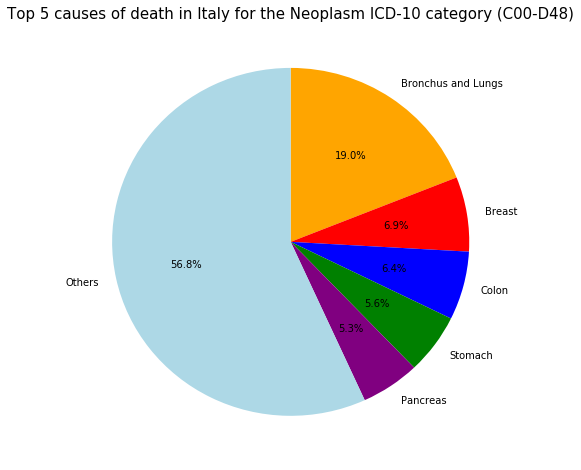

In [211]:
#Pie Chart
neoplasm = ["Bronchus and Lungs", "Breast", "Colon", "Stomach",\
            "Pancreas", "Others"]
colours = ["orange", "red", "blue", "green", "purple", "lightblue"]

fig1 = plt.figure(figsize=(8, 8))
plt1 = fig1.add_subplot(111)
plt1.pie(italy_5["Percentage"], labels=neoplasm, colors=colours, startangle=90, counterclock=False, autopct="%1.1f%%")
plt.title("Top 5 causes of death in Italy for the Neoplasm ICD-10 category (C00-D48)", fontsize=15)
plt.show()

#### Review of analysis:
* The top 5 causes of death of neoplasms are: Bronchus and lungs (C349, 19%), Breast (C509, 6.9%), Colon (C189, 6.4%), 
  Stomach (C169, 5.6%), Pancreas (C259, 5.3%).
* Bronchus and lungs is one fifth of the pie chart. 
* All top 5 causes together contribute to around over one third of all neoplasm causes of death.


## Question 4
####  Are there differences by age group for deaths from Neoplasms (C00-D48) in Australia for 2010?
* Identify the top five age groups in Australia dying with a Neoplams cause of death

In [161]:
#Check missing values
Aus = country_codes[country_codes["name"] == "Australia"]["country"].item()
aus_mort = mort_2010[mort_2010["Country"] == Australia]
print(aus_mort.isna().sum())

ita = country_codes[country_codes["name"] == "Italy"]["country"].item()
ita_mort = mort_2010[mort_2010["Country"] == Italy]
print(ita_mort.isna().sum())

ita_mort["Deaths1"].sum()
aus_mort["Deaths1"].sum()


Country          0
Admin1        3777
SubDiv        3777
Year             0
List             0
Cause            0
Sex              0
Frmat            0
IM_Frmat         0
Deaths1          0
Deaths2          0
Deaths3          0
Deaths4          0
Deaths5          0
Deaths6          0
Deaths7          0
Deaths8          0
Deaths9          0
Deaths10         0
Deaths11         0
Deaths12         0
Deaths13         0
Deaths14         0
Deaths15         0
Deaths16         0
Deaths17         0
Deaths18         0
Deaths19         0
Deaths20         0
Deaths21         0
Deaths22         0
Deaths23         0
Deaths24         0
Deaths25         0
Deaths26         0
IM_Deaths1       0
IM_Deaths2       0
IM_Deaths3       0
IM_Deaths4       0
dtype: int64
Country          0
Admin1        4970
SubDiv        4970
Year             0
List             0
Cause            0
Sex              0
Frmat            0
IM_Frmat         0
Deaths1          0
Deaths2          0
Deaths3          0
Deaths4          0

286946

In [130]:
#Top 5 age grops with neo cause of death in Aus in 2010
aus_neo_query = aus_mort.query("Cause >= 'C00' and Cause < 'D49'")\
    .drop(["Country", "Admin1", "SubDiv", "Year", "List", "Sex", "Frmat", "IM_Frmat"], axis=1)
aus_neo = pd.DataFrame(aus_neo_query.groupby(aus_neo_query.Cause, as_index=False).sum())

aus_neo.loc["Total_deaths"] = aus_neo.sum(axis=0, numeric_only=True)

aus_neo_df = pd.DataFrame(aus_neo.sort_values(by="Total_deaths", axis=1, ascending=False).iloc[-1, :6])
aus_neo_df.head(6) #viewed in a dataframe for presentation

,Total_deaths
Deaths1,43316
Deaths22,7167
Deaths21,6291
Deaths20,5713
Deaths23,5520
Deaths19,4768


#### Review of analysis:
* Sum of all deaths in all age groups is 43,316.
* Top 5 age groups of causes of death are: 
    * 80-84 years, 7167 deaths
    * 75-79 years, 6291 deaths
    * 70-74 years, 5713 deaths
    * 85 - 89 years, 5520 deaths
    * 65 - 69 years, 4768 deaths


## Question 5
####  Compare and contrast the frequency of deaths by Neoplams in Italy and Australia in 2010.
* Combine information on the population and deaths and describe your logic
* Use descriptive statistics and plots

In [132]:
#Check missing values
ita = country_codes[country_codes["name"] == "Italy"]["country"].item()
ita_mort = mort_2010[mort_2010["Country"] == Italy]
print(ita_mort.isna().sum())




Country          0
Admin1        4970
SubDiv        4970
Year             0
List             0
Cause            0
Sex              0
Frmat            0
IM_Frmat         0
Deaths1          0
Deaths2          0
Deaths3          0
Deaths4          0
Deaths5          0
Deaths6          0
Deaths7          0
Deaths8          0
Deaths9          0
Deaths10         0
Deaths11         0
Deaths12         0
Deaths13         0
Deaths14         0
Deaths15         0
Deaths16         0
Deaths17         0
Deaths18         0
Deaths19         0
Deaths20         0
Deaths21         0
Deaths22         0
Deaths23         0
Deaths24         0
Deaths25         0
Deaths26         0
IM_Deaths1       0
IM_Deaths2       0
IM_Deaths3       0
IM_Deaths4       0
dtype: int64


In [133]:
#Top 5 age grops with neo cause of death in Italy in 2010
ita_neo_query = ita_mort.query("Cause >= 'C00' and Cause < 'D49'")\
    .drop(["Country", "Admin1", "SubDiv", "Year", "List", "Sex", "Frmat", "IM_Frmat"], axis=1)
ita_neo = pd.DataFrame(ita_neo_query.groupby(ita_neo_query.Cause, as_index=False).sum())

ita_neo.loc["Total_deaths"] = ita_neo.sum(axis=0, numeric_only=True)

ita_neo_df = pd.DataFrame(ita_neo.sort_values(by="Total_deaths", axis=1, ascending=False).iloc[-1, :6])
ita_neo_df.head(6) #viewed in a dataframe for presentation

,Total_deaths
Deaths1,175046
Deaths22,31509
Deaths21,29884
Deaths20,25258
Deaths23,23794
Deaths19,17890


#### Review of analysis:
* Sum of all deaths in all age groups is 175,046.
* Top 5 age groups of causes of death are: 
    * 80-84 years, 31,509 deaths
    * 75-79 years, 29,884 deaths
    * 70-74 years, 25,258 deaths
    * 85 - 89 years, 23,794 deaths
    * 65 - 69 years, 17,890 deaths
* The top 5 age groups are the same as Australia

In [277]:
aus_population = population_2010[population_2010["Country"] == Australia].copy(deep=True)
print(aus_population.isnull().sum()) 
aus_pop_n = aus_population["Pop1"].sum()
aus_mort1 = aus_mort["Deaths1"].sum()
aus_mort_neo = aus_neo.loc["Total_deaths", "Deaths1"]



Country    0
Admin1     2
SubDiv     2
Year       0
Sex        0
Frmat      0
Pop1       0
Pop2       0
Pop3       0
Pop4       0
Pop5       0
Pop6       0
Pop7       0
Pop8       0
Pop9       0
Pop10      0
Pop11      0
Pop12      0
Pop13      0
Pop14      0
Pop15      0
Pop16      0
Pop17      0
Pop18      0
Pop19      0
Pop20      0
Pop21      0
Pop22      0
Pop23      0
Pop24      0
Pop25      0
Pop26      0
Lb         0
dtype: int64


In [182]:
print(aus_pop_n, '= Australia population in 2010')
print(aus_mort1, '= total number of deaths in Australia in 2010')
print(aus_mort_neo, '= total number of neoplams deaths')
print(((aus_mort_neo/aus_mort1)*100), '= percentage of neoplasms caused deaths')

22297515.0 = Australia population in 2010
286946 = total number of deaths in Australia in 2010
43316.0 = total number of neoplams deaths
15.095523199487012 = percentage of neoplasms caused deaths


In [186]:
ita_mort_neo = ita_neo.loc["Total_deaths", "Deaths1"]
print(italy_pop, '= Italy population in 2010')
print(italy_mort, '= total number of deaths in Italy in 2010')
print(ita_mort_neo, '= total number of neoplasm deaths')
print(((ita_mort_neo/italy_mort)*100), '= percentage of neoplasm caused deaths')

60483386.0 = Italy population in 2010
1169230 = total number of deaths in Italy in 2010
175046.0 = total number of neoplasm deaths
14.971049323058766 = percentage of neoplasm caused deaths


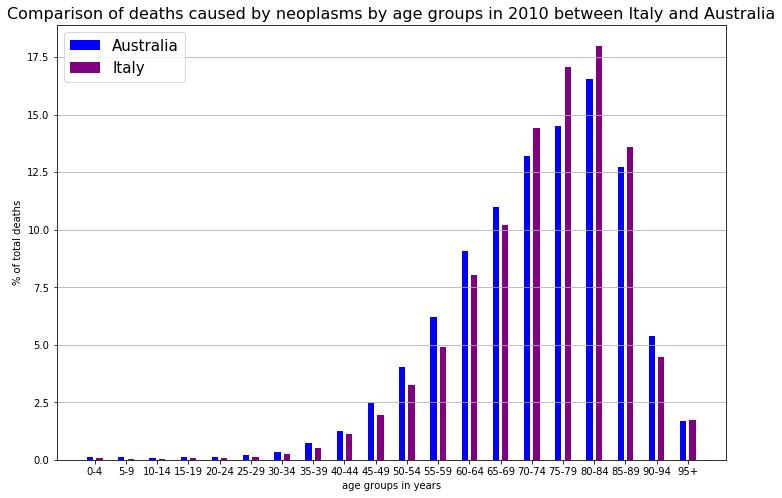

In [210]:
# Bar chart of neoplasm caused death by age group 

# age bands of 4 years exist so deaths from ages 0,1,2,3,4 were made into one group. 
aus_neo["Deaths2_6"] = aus_neo["Deaths2"] + aus_neo["Deaths3"] + aus_neo["Deaths4"] +\
    aus_neo["Deaths5"] + aus_neo["Deaths6"]
ita_neo["Deaths2_6"] = ita_neo["Deaths2"] + ita_neo["Deaths3"] + ita_neo["Deaths4"] +\
    ita_neo["Deaths5"] + ita_neo["Deaths6"]

# total number of deaths from each agw group, starting with age 0-4
#Australia
freq_aus = [aus_neo.loc["Total_deaths", "Deaths2_6"]] 
freq_aus.extend(list(aus_neo.iloc[-1, 7:26])) 

#Italy
freq_ita = [ita_neo.loc["Total_deaths", "Deaths2_6"]] 
freq_ita.extend(list(ita_neo.iloc[-1, 7:26])) 
tick_label = ["0-4", "5-9", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", \
              "60-64", "65-69", "70-74", "75-79", "80-84", "85-89", "90-94", "95+"]

# Plot
fig3, ax = plt.subplots(figsize=(12, 8))

x = np.arange(20) # to specify 20 slots of age groups

#Bars for Australia and Italy.
plt1 = ax.bar(x, freq_aus / aus_mort_neo * 100, 0.2, color="blue") 
plt2 = ax.bar(x + 0.3, freq_ita / ita_mort_neo * 100, 0.2, color="purple") 

ax.set_title("Comparison of deaths caused by neoplasms by age groups in 2010 between Italy and Australia", fontsize=16)
ax.set_xticks(x + 0.3 / 2)
ax.set_xticklabels(tick_label)
ax.set_xlabel("age groups in years")
ax.set_ylabel("% of total deaths")

ax.legend((plt1[0], plt2[0]), ("Australia", "Italy"), fontsize=15)


plt.grid(axis="y")

#### Review of analysis:
* In 2010, the population of Australia was 22,297,515 while the population of Italy was 60,483,386. 
* The total number of Australian deaths in that year was 286,946 from which 43,316 were caused by neoplams and Italian deaths was 1,169,230 from which 175,046 was caused by neoplasms.
* This shows that around 15% (to the nearest percentage) of all deaths in both countries were caused by neoplasms. 
* The bar chart shows that the percentage of neoplasm caused deaths increases with age group in both countries, until 80-84 years of age. After this the proportion of neoplasm caused deaths drops significantly with age group. The distribution is similar.
* It also shows that between the ages of 70-90 years, Italy has a higher proportion of neoplasm caused deaths compared to Australia.
* Whereas, in the lower age groups and until age 69, Australia has a higher percentage of neoplams caused deaths compared to Italy. 
* To make comparisons the percentage of deaths were calculated and visualised as opposed to frequency fo deaths. The reason being, Italy's population is significantly larger (around 3 times) and this would make it difficult to make comparisons of the distribution.


                                              END OF REPORT

Link to GitHub repository: https://github.com/KaranMehta21/DMHR